**Replace with your name and a brief description of the notebook.**

# Homework 13

Load the required libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

pd.set_option('display.max_columns', None)

### Question 1: Cleaning the data

a) Load the insurance dataset from Labs 7, 8, and 12, and turn the `sex`, `region`, and `smoker` columns into dummy variables.

Insurance data URL:  [https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv]( https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
data = pd.get_dummies(data, columns = ["sex", "region", "smoker"], drop_first = True)

1b) As in Labs 7, 8, and 12, we will predict the price of the insurance policy.  Create the `x` and `y` variables containing the independent and dependent variables, respectively, and then split them into training (70%) and testing (30%) data.

In [4]:
x = data.drop(columns = ["charges"])
y = data["charges"]

### Question 2:  k-nearest neighbor regression

a) Fit a k-nearest neighbor regression model, with k = 5 to the training data, and use it to predict the prices for both the test and training data.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

2b) Use your model from 2a predict the prices for both the test and training data.

In [11]:
y_test_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

2c)  What are the mean squared errors for the training and testing data?

In [13]:
mean_squared_error(y_test_pred, y_test)

131893923.33714314

In [14]:
mean_squared_error(y_train_pred, y_train)

83597636.15330546

2d) How do the two mean squared errors compare?  How do they compare to the mean squared errors from linear regression and decisions trees that you computed in Lab 12?  Which model would you recommend to predict insurance prices?

**Answer 2d:** The regression model from Lab 12 had an MSE of _21,827,606_; this KMeans model had an MSE of _83,597,636_. Given this, KMeans is not the best model for predicting insurance prices.

### Question 3: Scaling the data

a) Scale the training and testing data to be between 0 and 1.

In [15]:
scaler = MinMaxScaler()

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

3b) Fit a k-nearest neighbor regression model, with k = 5 to the scaled training data, and use it to predict the prices for both the scaled test and training data.

In [17]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

3c) Use your model from 3b to predict the prices for both the scaled test and training data.

In [18]:
y_scaled_test_pred = knn.predict(x_test_scaled)
y_scaled_train_pred = knn.predict(x_train_scaled)

3d) What are the mean squared errors for the scaled training and testing dat

In [19]:
mean_squared_error(y_scaled_test_pred, y_test)

35887788.98320836

In [20]:
mean_squared_error(y_scaled_train_pred, y_train)

21398776.461228173

3e) How do the two mean squared errors using scaled data compare?  How do they compare to the unscaled mean squared errors from Question 2?  Do you recommend scaling the insurance data when using the k-nearest neighbors model?  Of the k-nearest neighbor model (with scaled data), and the decision tree and linear regression models from Lab 12, which would you recommend now?  Why?

**3e answer:** The MSE of the scaled models was much better than that of the unscaled ones. Given the new MSE scores of this model, I would reccomend this new scaled model as the one from Lab 12's MSE was over 300k.

### Question 4:  Best parameter (k)

a) For at least two new, different values of k (you may use a loop if you want, but do not have to):
    * fit your model to the scaled training data
    * use your model to predict insurance prices for the training and testing data
    * compute the mean squared errors for both predictions

In [21]:
mses = []
for k in range(1,6):
    print("Now computing MSE for k=",k)
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(x_train_scaled, y_train)
    iy_pred_scaled = iknn_scaled.predict(x_test_scaled)
    mse = mean_squared_error(iy_pred_scaled, y_test)
    mses.append(mse)

Now computing MSE for k= 1
Now computing MSE for k= 2
Now computing MSE for k= 3
Now computing MSE for k= 4
Now computing MSE for k= 5


Text(0.5, 1.0, 'MSE for different numbers of neighbors')

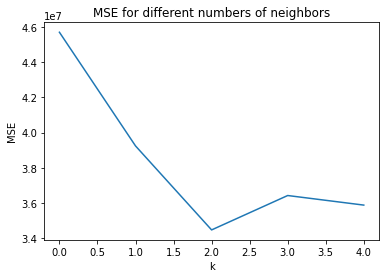

In [22]:
plt.plot(mses)
plt.xlabel("k")
plt.ylabel("MSE")
plt.title("MSE for different numbers of neighbors")

4b) Which parameter k do you recommend using for fitting a k-nearest neighbor model on this insurance data?  Why? 

**Answer 4b:** I would reccomend a K value of 2 because it had the lowest MSE of all my tests, which covered a range from k=1 through k=5.

4c)  Of the best k-nearest neighbor model (this question), the best decision tree model (Lab 12), or linear regression, which do you recommend we use to predict insurance prices?  Why?

**Answer 4c:** Though they all have their strengths, I would reccomend the KNN model where k=2. The decision tree had a high runtime and MSE, the linear regression model had a high MSE, and the other KNN models had MSEs' larger than 10x the KNN model where k=2. For this reason, I would reccoment the k=2 KNN.